## Rozwiązywanie równań nieliniowych 
Funkcje testowe: 
$$f_1(x) = 2x^2 -2x + 1$$
$$f_2(x) = -26 + 85x - 91x^2 +44x^3 -8x^4 + x^5$$
$$f_3(x) = 4^x - 3^{2x} + 2^{3x} -1$$
$$f_4(x) = 3x + sin(x) - cos^3(x)$$
$$f_5(x) = 27x^3−3x+1$$

In [57]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.misc import derivative
from tabulate import tabulate
from scipy import optimize as opt


f1 = lambda x: 2*x**2 - 2*x + 1
f1_name = "f(x)=2x^2−2x+1"
f2 = lambda x: -26 + 85*x - 91*x**2 + 44*x**3 - 8*x**4 + x**5
f2_name = "f(x)=−26+85x−91x^2+44x^3−8x^4+x^5"
f3 = lambda x: pow(4, x) - pow(3, 2*x) + pow(2, 3*x) - 1
f3_name = "f(x)=4^x−3^(2x)+2^(3x)−1"
f4 = lambda x: 3*x + math.sin(x) - math.cos(x)**3
f4_name = "f(x)=3x+sin(x)−(cos(x))^3"
f5 = lambda x: 27*x**3 - 3*x + 1
f5_name = "f(x)=27x^3−3x+1"


def to_chart(fun, a, b, n, func_name):
    x_axis = np.linspace(a, b, n)
    plt.plot(x_axis, np.vectorize(fun)(x_axis), label=func_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(func_name)
    plt.grid()
    plt.show()

### Zadanie 1:
Zaimplementuj metodę bisekcji. Sprawdź jej działanie na powyższych funkcjach testowych. Dobierz samodzielnie przedział dla poszukiwania miejsca zerowego. Sprawdź dokładnośc metody. 
Oceń szybkość zbieżności dla każdej testowanej funkcji. Zwróć uwagę na sposób doboru E.

In [58]:
def bisection_method(a, b, fun, n):  # n is the max number of allowed iterations
    if fun(a) * fun(b) > 0 or n <= 0 or b < a:
        return "Not found", "Not found"
    else:
        d = b - a
        x_0 = 1
        for i in range(n):
            x_0 = (a + b) / 2.0
            if fun(x_0) == 0:
                e = d / 2**i
                return x_0, e
            elif fun(a) * fun(x_0) < 0:
                b = x_0
            else:
                a = x_0

        e = d / 2**n
        return x_0, e


def compute():
    to_chart(f1, -2, 2, 100, f1_name)
    x_0, e = bisection_method(-2, 2, f1, 100)
    print("Initial range: [-2, 2]")
    print(f"Root = {x_0}")
    print(f"E = {e}")

    to_chart(f2, 0, 1, 100, f2_name)
    x_0, e = bisection_method(0, 1, f2, 100)
    print("Initial range: [0, 1]")
    print(f"Root = {x_0}")
    print(f"E = {e}")

    to_chart(f3, -1, 2, 100, f3_name)
    x_0, e = bisection_method(1.5, 2, f3, 100)
    print("Initial range: [1.5, 2]")
    print(f"Root = {x_0}")
    print(f"E = {e}")

    to_chart(f4, -1, 1, 100, f4_name)
    x_0, e = bisection_method(-1, 1, f4, 100)
    print("Initial range: [-1, 1]")
    print(f"Root = {x_0}")
    print(f"E = {e}")

    to_chart(f5, -1, 1, 100, f5_name)
    x_0, e = bisection_method(-1, 1, f5, 100)
    print("Initial range: [-1, 1]")
    print(f"Root = {x_0}")
    print(f"E = {e}")

#### Przedział obejmujący wykres jest jednocześnie przedziałem poszukiwań.

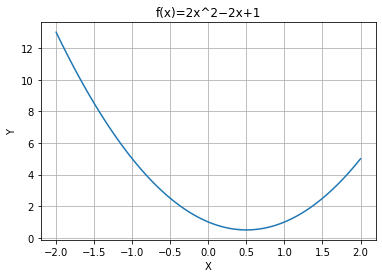

Initial range: [-2, 2]
Root = Not found
E = Not found


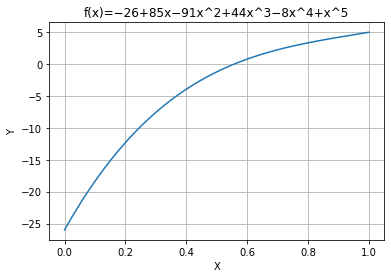

Initial range: [0, 1]
Root = 0.5570255162865259
E = 7.888609052210118e-31


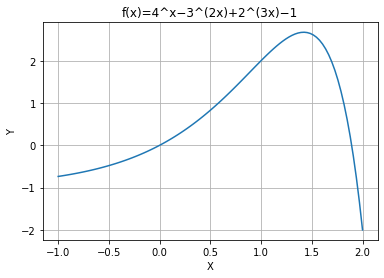

Initial range: [1.5, 2]
Root = 1.892840458109823
E = 3.944304526105059e-31


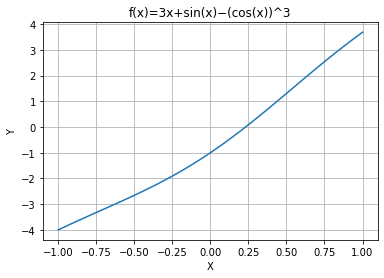

Initial range: [-1, 1]
Root = 0.2310996034771355
E = 5.551115123125783e-17


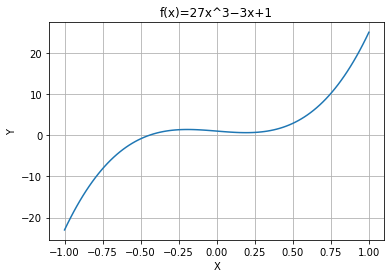

Initial range: [-1, 1]
Root = -0.4415726524149154
E = 1.5777218104420236e-30


In [59]:
compute()

### Obserwacje

Metoda bisekcji jest prostym algorytmem, pozwalającym szukać miejsc zerowych funkcji. W zastosowanej przeze mnie impelementacji liczba dozwolnych iteracji w poszukiwaniu miesjca zerowego jest z góry określona. Na jej podstawie też określam błąd E, ze wzoru 
$$E=b_n-a_n= ... =\frac{a_0-b_0}{2^N}$$
gdzie N to liczba wykonanych interacji. Im więcej iteracji tym mniejszy błąd. Błąd E określa rozmiar przedziału, w którym znajduje się rozwiązanie (maksymalna wartość, o ktorą mogliśmy się pomylić).
Krtyterium zbieżnośći jest dobre (błąd E jest znacznie mniejszy od znalezionego rozwiązania) dla wszystkich powyższych funkcji posiadających rozwiązania, jednak dla funkcji $f_3$ i $f_4$ szybkość zbieżności jest zdecydowanie większa niż dla $f_2$ i $f_5$, gdyż E jest o ok 15 rzędów wielkości mniejsze.

### Zadanie 2: 
Zaimplementuj metodę Newtona-Raphsona.  Sprawdź jej działanie na powyższych funkcjach testowych. Punkt startowy i przedział poszukiwań dobierz samodzielnie (jakie warunki?). 

In [60]:
def newton_raphson(fun, x, n):
    for i in range(n):
        if derivative(fun, x) == 0:
            return "Not found"
        h = fun(x) / derivative(fun, x)
        x = x - h

    return x


def comparison_2():
    to_chart(f1, -2, 2, 100, f1_name)
    print("Initial guess: 0.5")
    print(f"Root: {newton_raphson(f1, 0.5, 100)}")

    to_chart(f2, 0, 1, 100, f2_name)
    print("Initial guess: 0.5")
    print(f"Root: {newton_raphson(f2, 0.5, 100)}")

    to_chart(f3, -4, 2, 100, f3_name)
    print("Initial guess: 1.6")
    print(f"Root: {newton_raphson(f3, 1.6, 100)}")

    to_chart(f4, -1, 1, 100, f4_name)
    print("Initial guess: 0")
    print(f"Root: {newton_raphson(f4, 0, 100)}")

    to_chart(f5, -1, 1, 100, f5_name)
    print("Initial guess: -0.5")
    print(f"Root: {newton_raphson(f5, -0.5, 100)}")

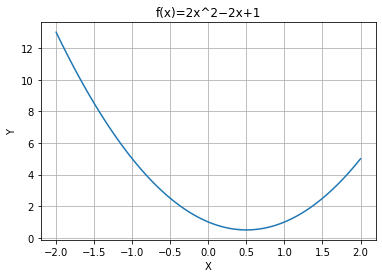

Initial guess: 0.5
Root: Not found


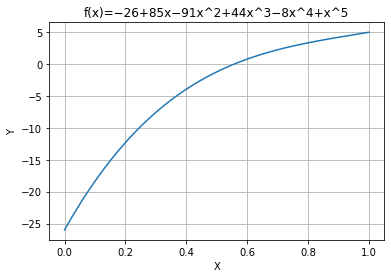

Initial guess: 0.5
Root: 0.5570255162865257


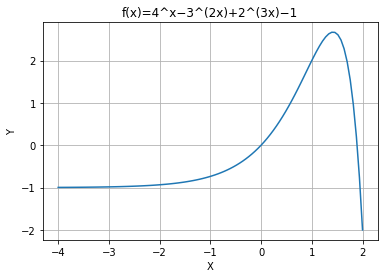

Initial guess: 1.6
Root: 1.8928404581098135


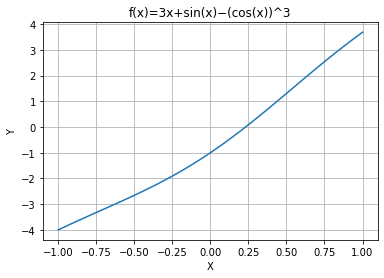

Initial guess: 0
Root: 0.2310996034771355


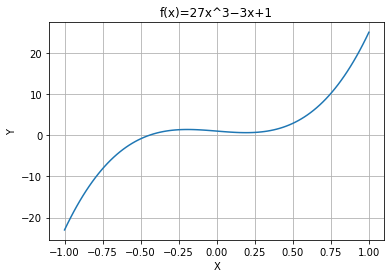

Initial guess: -0.5
Root: -0.4415726524149154


In [61]:
comparison_2()

### Obserwacje

Początkowy punkt powien zostać określony możlwie jak najbliżej rzeczywistego miejsca zerowego funkcji. Gdy w pobliżu $x_0$ występują punkty przegięć, lokalne minima lub lokalne maksima to metoda Newtona-Raphsona może nie zadziałać. Sugerowane jest wówczas albo znalezienie takiego punktu początkowego (na tyle blisko $x_0$), że w pobliżu nie będą występować wyżej wspomniane punkty albo zastosowanie np. metody bisekcji.

### Zadanie 3: 
Zaimplementuj metodę siecznych (Eulera). Przedział poszukiwań dobierz samodzielnie (jakie warunki?). 

In [62]:
def secant_method(fun, x0, x1, n):
    if fun(x0) * fun(x1) >= 0 or n <= 0 or x0 >= x1:
        return "No root found"

    for i in range(n):
        x2 = x1 - (fun(x1) * (x1 - x0)) / (fun(x1) - fun(x0))
        x0, x1 = x1, x2

    return x2


def comparison_3():
    to_chart(f1, -2, 2, 100, f1_name)
    print("Range: [-1, 2]")
    print(f"Root: {secant_method(f1, -1, 2, 10)}")

    to_chart(f2, 0, 1, 100, f2_name)
    print("Initial range: [0.4, 0.6]")
    print(f"Root: {secant_method(f2, 0.4, 0.6, 10)}")

    to_chart(f3, -4, 2, 100, f3_name)
    print("Initial range: [1, 2]")
    print(f"Root: {secant_method(f3, 1, 2, 10)}")

    to_chart(f4, -1, 1, 100, f4_name)
    print("Initial range: [0, 0.5]")
    print(f"Root: {secant_method(f4, 0, 0.5, 5)}")

    to_chart(f5, -1, 1, 100, f5_name)
    print("Initial range: [-0.75, -0.25]")
    print(f"Root: {secant_method(f5, -0.75, -0.25, 8)}")

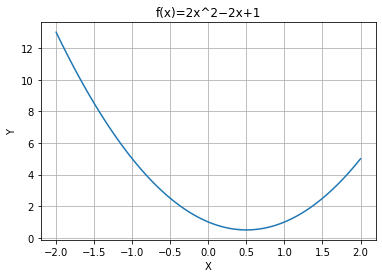

Range: [-1, 2]
Root: No root found


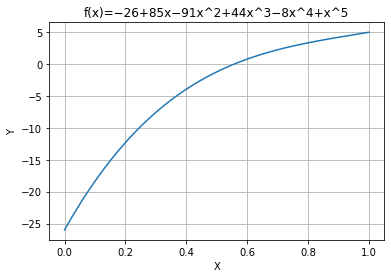

Initial range: [0.4, 0.6]
Root: 0.5570255162865259


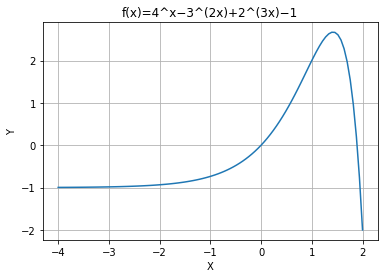

Initial range: [1, 2]
Root: 1.8928404581098222


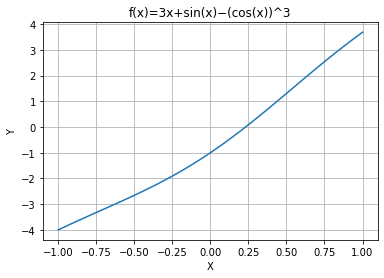

Initial range: [0, 0.5]
Root: 0.23109960347713526


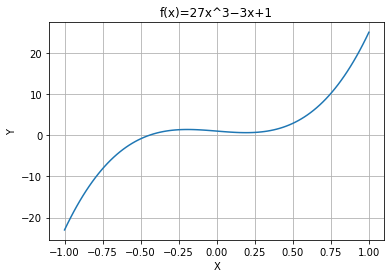

Initial range: [-0.75, -0.25]
Root: -0.4415726533762621


In [63]:
comparison_3()

### Obserwacje

Podobnie jak dla przednich metod ważne jest aby okreslić przedział, w którym znajduje się możliwie jedno miejsce zerowe (aby uniknąć konfliktów). Należy tez kontrolowac liczbe iteracji aby uniknąć liczych błędów, w postaci dzielnia przez 0 lub przepełnienia typów.

### Zadanie 4: 
Wybierz jedną z metod rozwiązywania równań nieliniowych dostępna w bibliotece numpy lub scipy.  Porównaj dokładność wszystkiech czterech metod.

In [64]:
def comparison_4(fun, a, b, n, fun_name):
    ref = opt.bisect(fun, a, b)  # used as reference value
    b_m = bisection_method(a, b, fun, n)[0]
    n_r = newton_raphson(fun, b, n)
    s_m = secant_method(fun, a, b, n)

    print(f"Function {fun_name}, range: [{a}, {b}]")
    res = [["SciPy bisection method", ref, 0, 0],
           ["Bisection method", b_m, (abs(b_m - ref) / abs(ref))*100, abs(ref - b_m)],
           ["Newton-Raphson method", n_r, (abs(n_r - ref) / abs(ref))*100, abs(ref - n_r)],
           ["Secant method", s_m, (abs(s_m - ref) / abs(ref))*100, abs(ref - s_m)]]

    print(tabulate(res, headers=["Method", "Value", "Relative error [%]", "Absolute error"], tablefmt="grid"))

In [65]:
comparison_4(f2, 0, 1, 10, f2_name)

Function f(x)=−26+85x−91x^2+44x^3−8x^4+x^5, range: [0, 1]
+------------------------+----------+----------------------+------------------+
| Method                 |    Value |   Relative error [%] |   Absolute error |
+========================+==========+======================+==================+
| SciPy bisection method | 0.557026 |          0           |      0           |
+------------------------+----------+----------------------+------------------+
| Bisection method       | 0.557617 |          0.10622     |      0.000591671 |
+------------------------+----------+----------------------+------------------+
| Newton-Raphson method  | 0.560222 |          0.573863    |      0.00319656  |
+------------------------+----------+----------------------+------------------+
| Secant method          | 0.557026 |          1.69017e-10 |      9.41469e-13 |
+------------------------+----------+----------------------+------------------+


In [66]:
comparison_4(f3, 1, 2, 10, f3_name)

Function f(x)=4^x−3^(2x)+2^(3x)−1, range: [1, 2]
+------------------------+---------+----------------------+------------------+
| Method                 |   Value |   Relative error [%] |   Absolute error |
+========================+=========+======================+==================+
| SciPy bisection method | 1.89284 |          0           |      0           |
+------------------------+---------+----------------------+------------------+
| Bisection method       | 1.89355 |          0.0377332   |      0.000714229 |
+------------------------+---------+----------------------+------------------+
| Newton-Raphson method  | 1.89855 |          0.301882    |      0.00571414  |
+------------------------+---------+----------------------+------------------+
| Secant method          | 1.89284 |          6.72642e-11 |      1.2732e-12  |
+------------------------+---------+----------------------+------------------+


In [67]:
comparison_4(f4, 0, 1, 6, f4_name)

Function f(x)=3x+sin(x)−(cos(x))^3, range: [0, 1]
+------------------------+----------+----------------------+------------------+
| Method                 |    Value |   Relative error [%] |   Absolute error |
+========================+==========+======================+==================+
| SciPy bisection method | 0.2311   |          0           |      0           |
+------------------------+----------+----------------------+------------------+
| Bisection method       | 0.234375 |          1.41731     |      0.0032754   |
+------------------------+----------+----------------------+------------------+
| Newton-Raphson method  | 0.231114 |          0.0061481   |      1.42082e-05 |
+------------------------+----------+----------------------+------------------+
| Secant method          | 0.2311   |          1.83624e-10 |      4.24355e-13 |
+------------------------+----------+----------------------+------------------+


In [68]:
comparison_4(f5, -0.75, -0.25, 10, f5_name)

Function f(x)=27x^3−3x+1, range: [-0.75, -0.25]
+------------------------+-----------+----------------------+------------------+
| Method                 |     Value |   Relative error [%] |   Absolute error |
+========================+===========+======================+==================+
| SciPy bisection method | -0.441573 |          0           |      0           |
+------------------------+-----------+----------------------+------------------+
| Bisection method       | -0.441895 |          0.0728937   |      0.000321879 |
+------------------------+-----------+----------------------+------------------+
| Newton-Raphson method  | -0.435792 |          1.30905     |      0.00578042  |
+------------------------+-----------+----------------------+------------------+
| Secant method          | -0.441573 |          1.84169e-11 |      8.13238e-14 |
+------------------------+-----------+----------------------+------------------+


### Wnioski

Na podstawie pozwyższego porównania 4 metod rozwiązywania równań nieliniowych, z metodą bisekcji z biblioteki SciPy jako metodą referencyjną, można łatwo zauważyć, że najlepiej spisuje się metoda siecznych. Wartość miejsca zerowego wyliczona przez tą funkcję jest najbliższa oczekiwanej. W ogólności jednak wszystkie metody spisują się dobrze, czego dowodem jest ich szerokie zastosowanie w nauce.